<a href="https://colab.research.google.com/github/deepa905/customer-trends-data-analysis-SQL-Python-PowerBI/blob/main/Customer_shopping_behaviour_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("customer_shopping_behavior.csv")

df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [2]:
# Shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Data types and null values
df.info()


Rows: 3900, Columns: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used 

**Missing value analysis**

In [3]:
# Missing values count
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
Review Rating,37


In [4]:
# Percentage of missing values
(df.isnull().sum() / len(df)) * 100


,0
Customer ID,0.000000
Age,0.000000
Gender,0.000000
Item Purchased,0.000000
Category,0.000000
Purchase Amount (USD),0.000000
Location,0.000000
Size,0.000000
Color,0.000000
Season,0.000000


In [5]:
df['Review Rating'] = df.groupby('Category')['Review Rating']\
                        .transform(lambda x: x.fillna(x.median()))


In [6]:
# Numerical summary
df.describe()


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.750051,25.351538
std,1125.977353,15.207589,23.685392,0.713590,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.800000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
# Categorical summary
df.describe(include='object')


,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


**Univariate Analysis**

**Age distribution**

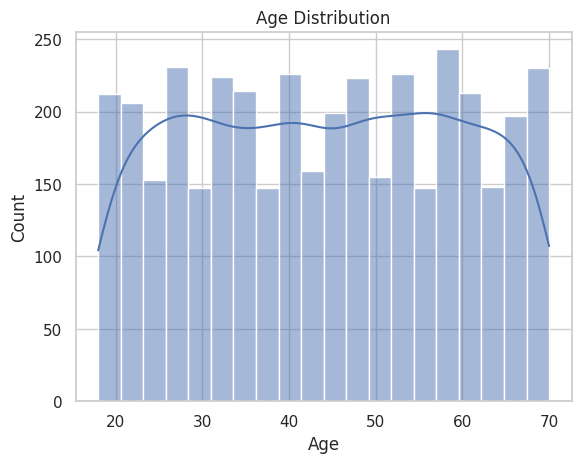

In [8]:
plt.figure()
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


**Purchase Amount Distribution**

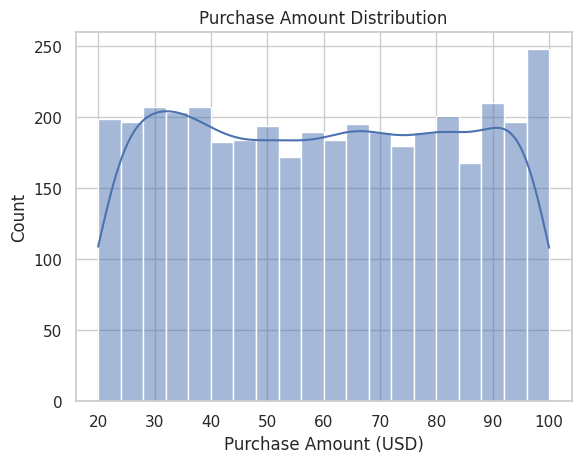

In [9]:
plt.figure()
sns.histplot(df['Purchase Amount (USD)'], bins=20, kde=True)
plt.title("Purchase Amount Distribution")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Count")
plt.show()


**Categorical analysis**

**Gender distribution**

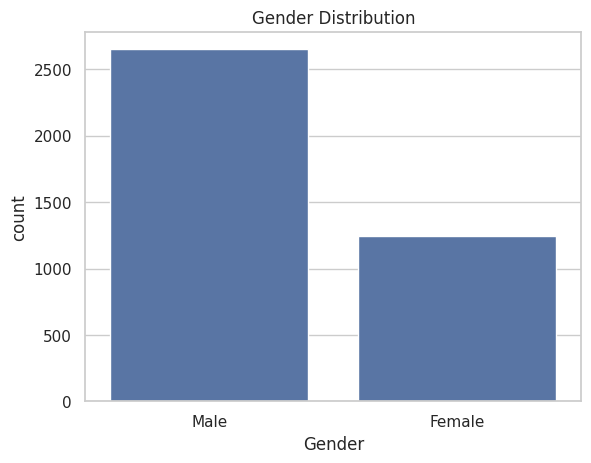

In [10]:
plt.figure()
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()


**Category wise purchases**

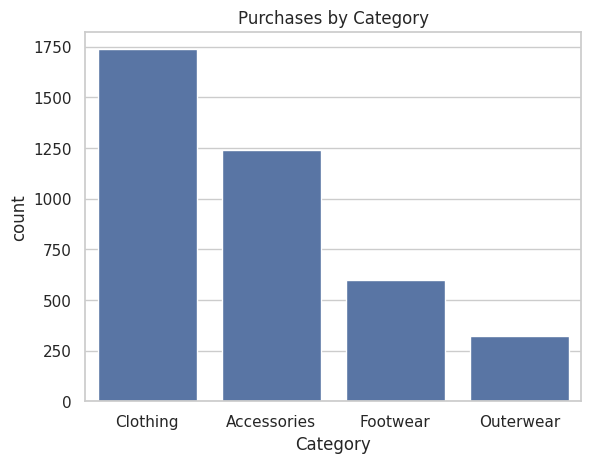

In [11]:
plt.figure()
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title("Purchases by Category")
plt.show()


**Bivariate Analysis (Non-Linear Focus)**
Purchase Amount by Category

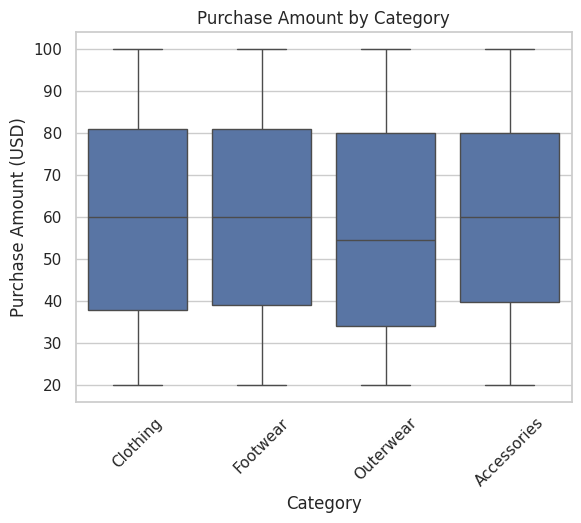

In [12]:
plt.figure()
sns.boxplot(data=df, x='Category', y='Purchase Amount (USD)')
plt.title("Purchase Amount by Category")
plt.xticks(rotation=45)
plt.show()


**Purchase amount by subscription status**

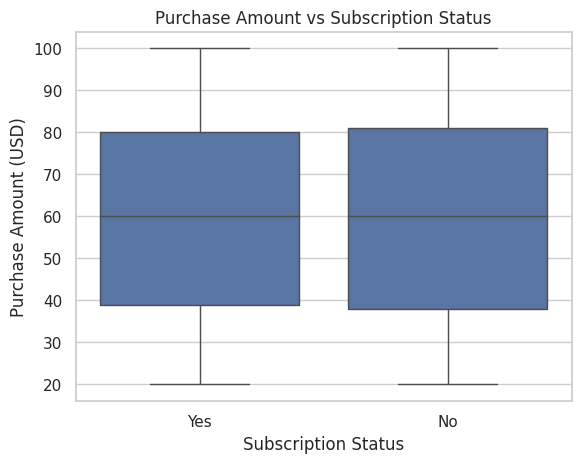

In [13]:
plt.figure()
sns.boxplot(data=df, x='Subscription Status', y='Purchase Amount (USD)')
plt.title("Purchase Amount vs Subscription Status")
plt.show()


**Purchase amount by shipping type**

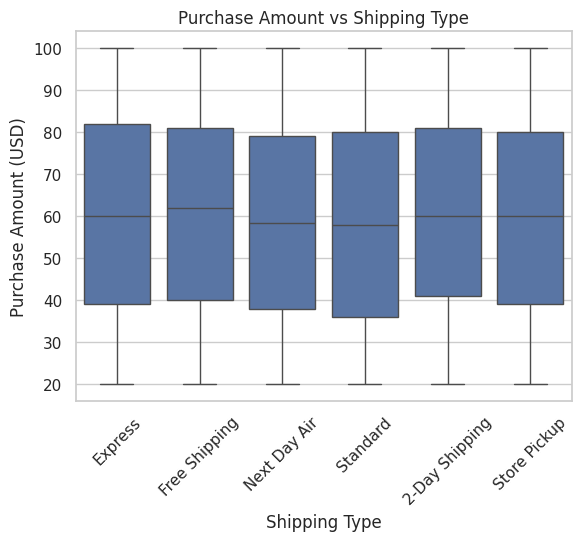

In [14]:
plt.figure()
sns.boxplot(data=df, x='Shipping Type', y='Purchase Amount (USD)')
plt.title("Purchase Amount vs Shipping Type")
plt.xticks(rotation=45)
plt.show()


**Correlation analysis of numerical variables**

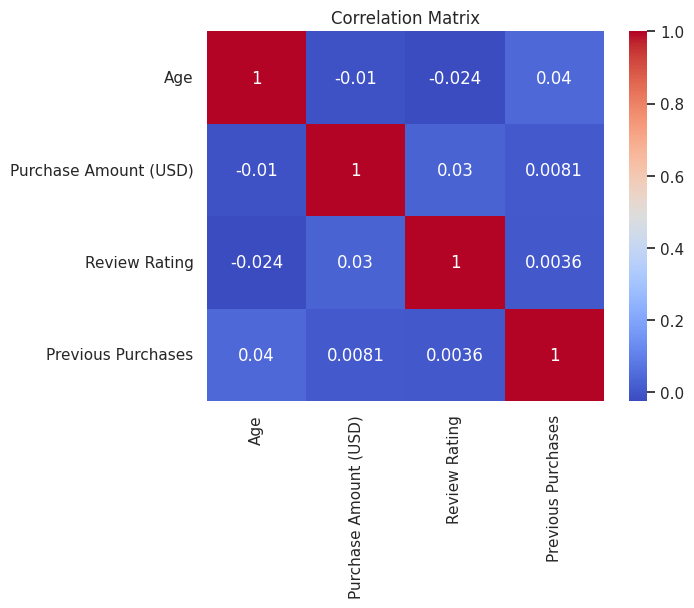

In [15]:
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

plt.figure()
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


No strong linear correlations → confirms segment-based behavior.

**Feature engineering for analysis**

In [16]:
df['Age Group'] = pd.cut(
    df['Age'],
    bins=[17, 25, 35, 45, 55, 70],
    labels=['18-25', '26-35', '36-45', '46-55', '56+']
)


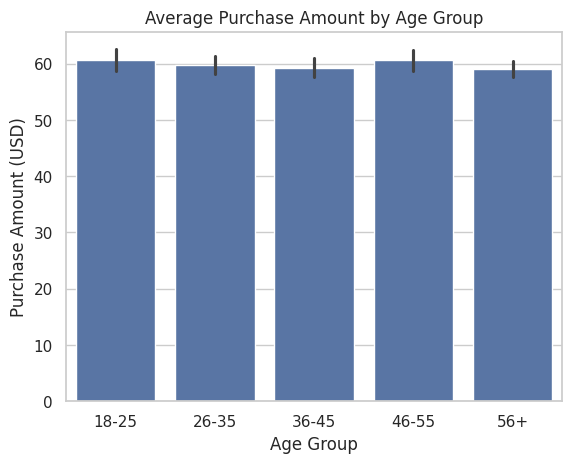

In [17]:
plt.figure()
sns.barplot(data=df, x='Age Group', y='Purchase Amount (USD)', estimator=np.mean)
plt.title("Average Purchase Amount by Age Group")
plt.show()


**Discount and loyalty analysis**

Discout impact

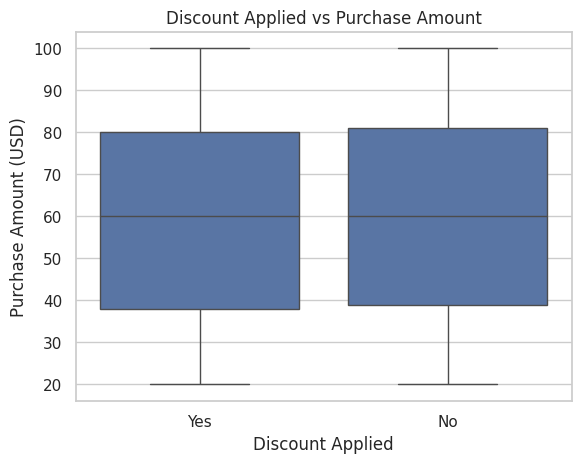

In [18]:
plt.figure()
sns.boxplot(data=df, x='Discount Applied', y='Purchase Amount (USD)')
plt.title("Discount Applied vs Purchase Amount")
plt.show()


Previous purchase vs subscription

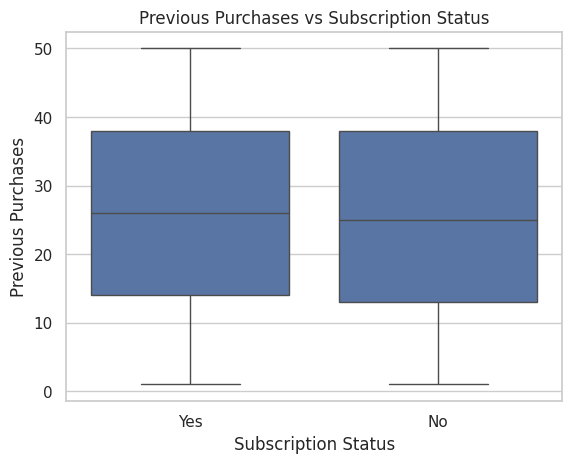

In [19]:
plt.figure()
sns.boxplot(data=df, x='Subscription Status', y='Previous Purchases')
plt.title("Previous Purchases vs Subscription Status")
plt.show()


Key Findings:
- No strong linear relationship between purchase amount and numerical variables.
- Customer behavior is driven by categorical segments such as category, subscription status, and shipping type.
- Discounts influence purchase behavior but do not significantly increase transaction value.
- Subscription appears to impact retention rather than average spend.
